## Вариант 13

In [2]:
import numpy as np
from matplotlib import pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Дана неотрицательная функция 𝑝(𝑥), непрерывная на отрезке [𝑎, 𝑏] и принимающая
нулевое значение вне этого отрезка.

Дана ещё одна неотрицательная функция 𝑞(𝑦), непрерывная на отрезке [𝑐, 𝑑] и
принимающая нулевое значение вне этого отрезка.

Мы полагаем далее, что X – непрерывная случайная величина с плотностью
вероятности 𝑃 ∙ 𝑝(𝑥). Аналогично, Y – непрерывная случайная величина с плотностью вероятности 𝑄 ∙ 𝑞(𝑦).

Требуется с помощью численного метода интегрирования высокого порядка вычислить с шагом по аргументу h=0,01: 


 - Постоянные множители P и Q, при которых $\int\limits_1^3 P p(x)dx$ и 
 $\int\limits_0^1 Q q(y)dy$
 - Множество элементарных исходов случайной величины Z = X + Y
 - Плотность вероятности суммы случайных величин Z = X + Y 
 - Полную вероятность для случайной величины Z:      $\int\limits_{z_{max}}^{z_{min}} f(z)dz$, сравнив в конце результат с единицей.
 - Вывести графики плотностей вероятности для величин X, Y, Z.

#### Вычислим постоянные множители P и Q

По условию задано:
 - $p(x) = e^{-8x^2}$, на участке [-1, 1]
 - $q(x) = e^{-2x^2}$, на участке [-2, 2]

In [3]:
def p(x):
    if x >= -1 and x <= 1:
        return np.exp(-8*x*x)
    return 0

def q(x):
    if x >= -2 and x <= 2:
        return np.exp(-2*x*x)
    return 0

In [4]:
# средние прямоугольники для нахождения констант
def seek_constant(low, high, function, h):
    sum_p = 0
    while low <= high:
        sum_p += function((low + (low + h)) / 2)
        low += h
    const = 1 / (h * sum_p)
    return const

In [5]:
a, b = -1, 1
c, d = -2, 2

P = seek_constant(a, b, p, 0.01)
Q = seek_constant(c, d, q, 0.01)

print('Постоянные множители:')
print('P = %.4f' % P)
print('Q = %.4f' % Q)

Постоянные множители:
P = 1.5959
Q = 0.7979


In [6]:
print('Множество элементарных исходов случайной величины Z = X + Y: %.4f' % (P * Q))

Множество элементарных исходов случайной величины Z = X + Y: 1.2734


Метод средних прямоугольников:

In [7]:
# средние прямоугольники для подсчета интеграла
def average_rectangle(low, high, function, h, z = None):
    integral = 0
    while low <= high:
        if z or z == 0.:
            if z < -3 or z > 3:
                return 0
            else:
                integral += function( (low + (low + h)) / 2, z)
        else:
            integral += function( (low + (low + h)) / 2)
        low += h
    return integral * h

Проверим значения интегралов:

In [8]:
func_p = lambda x: P * p(x)
func_q = lambda x: Q * q(x)
print('first integral = %.4f ' % average_rectangle(a, b, func_p, 0.01))
print('second integral = %.4f ' % average_rectangle(c, d, func_q, 0.01))

first integral = 1.0000 
second integral = 1.0000 


#### Плотность вероятности суммы случайных величин Z = X + Y:

In [9]:
func_z = lambda x, z: P * p(x) * Q * q(z - x)

Посмотрим на значения в некоторых точках:

In [10]:
print('При z = 0.5:  %.4f ' % average_rectangle(a, b, func_z, 0.01, z = 0.5))
print('При z = 1:  %.4f ' % average_rectangle(a, b, func_z, 0.01, z = 1))

При z = 0.5:  0.4784 
При z = 1:  0.1441 


#### Посчитаем полную вероятность для величины Z:

In [11]:
n1 = (b - a) / 0.01
n2 = (d - c) / 0.01
Z = np.linspace(a + c, b + d, int(n1 + n2 + 1))
F = np.zeros(int(n1 + n2 + 1))
for i in range(F.shape[0]):
    F[i] = average_rectangle(a, b, func_z, 0.01, Z[i])

In [12]:
# трапеции для нахождения интеграла
def full_probability_for_z(X, h):
    integral = 0
    for i in range(X.shape[0] - 1):
        integral += (X[i] + X[i + 1]) / 2
    return integral * h

In [14]:
print('Полная вероятность Z = %.4f' % full_probability_for_z(F, 0.01))

Полная вероятность Z = 1.0000


In [20]:
full_probability_for_z(F, 0.01)

0.9999999999999994

#### Графики плотностей вероятности для X, Y, Z

In [16]:
def plotting(X, func, label):
    plt.plot(X, [func(i) for i in X],
         label = label)
    plt.legend()

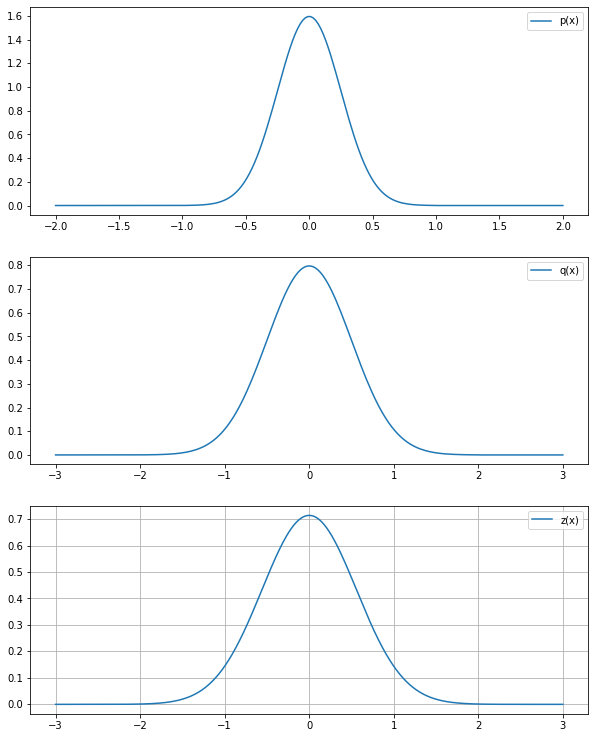

In [22]:
plt.figure(figsize(10, 13))
plt.subplot(3, 1, 1)
plotting(np.linspace(-2, 2, 200), func_p, 'p(x)')

plt.subplot(3, 1, 2)
plotting(np.linspace(-3, 3, 200), func_q, 'q(x)')

plt.subplot(3, 1, 3)
plt.plot(Z, F, label = 'z(x)')
plt.legend()

plt.grid(True)
plt.show()

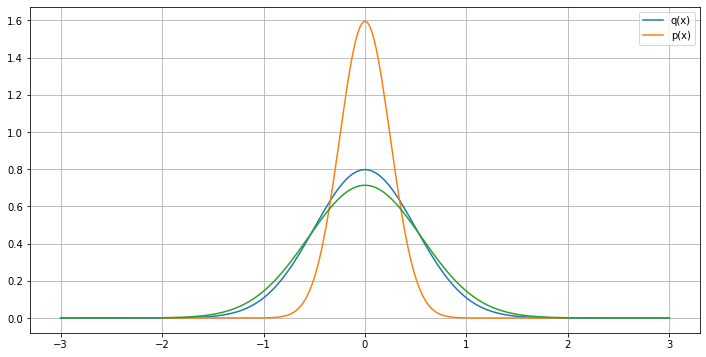

In [28]:
plt.figure(figsize(12,6))
plotting(np.linspace(-3, 3, 200), func_q, 'q(x)')
plotting(np.linspace(-2, 2, 200), func_p, 'p(x)')
plt.plot(Z, F, label = 'z(x)')
plt.grid(True)